## Week 1

**Statistical power** - the probability that you will observe a significant effect, if there is a true effect.




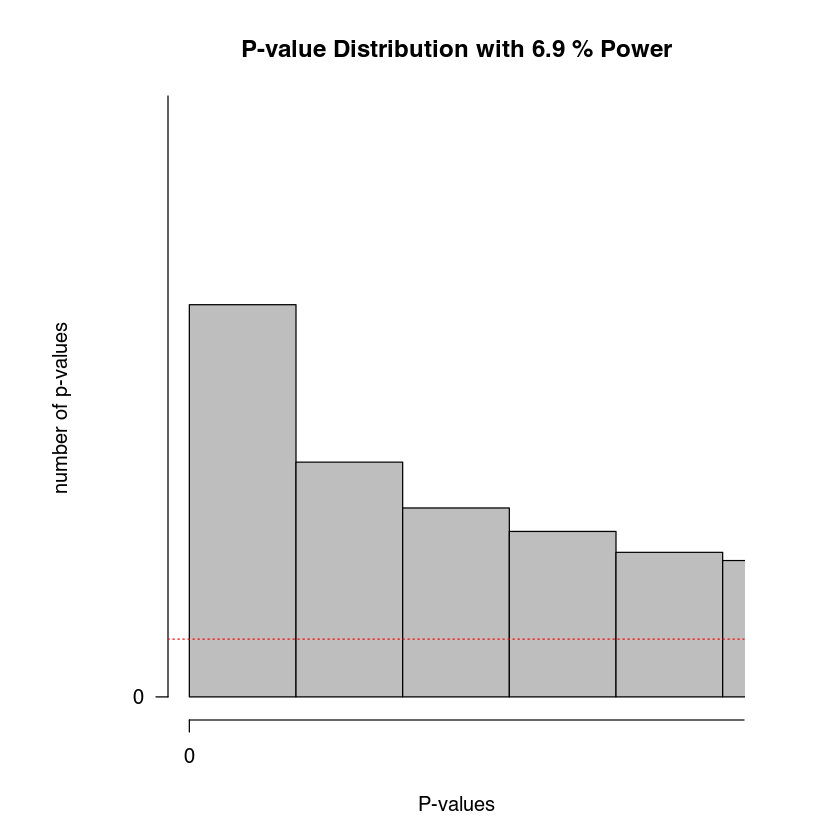

In [31]:
#Load pwr package to easily calculate the statistical power
if(!require(pwr)){install.packages('pwr')}
library(pwr)
#Disable scientific notation (1.05e10)
options(scipen=999)
#Set number of simulations
nSims <- 100000 #number of simulated experiments

M<-102 #Mean IQ score in the sample (will be compared with 100 in a one-sample t-test)
#M<-100 # Q4
#n<-26 #set sample size
n<-70 # Q2
SD<-15 #SD of the simulated data
#With a mean difference of 6, and SD of 15, and a sample size of 26, the test has 50% power)
  
p <-numeric(nSims) #set up empty variable to store all simulated p-values
bars<-100
#Run simulation
for(i in 1:nSims){ #for each simulated experiment
  x<-rnorm(n = n, mean = M, sd = SD) #Simulate data with specified mean, standard deviation, and sample size
  z<-t.test(x, mu=100) #perform the t-test against mu (set to value you want to test against)
  p[i]<-z$p.value #get the p-value and store it
}

#Check power by summing significant p-values and dividing by number of simulations
#(sum(p < 0.05)/nSims) #power
#Calculate power formally by power analysis
#power<-pwr.t.test(d=(M-100)/SD, n=n,sig.level=0.05,type="one.sample",alternative="two.sided")$power #determines M when power > 0. When power = 0, will set  M = 100.
power<-pwr.t.test(d=(M-100)/SD, n=n,sig.level=0.01,type="one.sample",alternative="two.sided")$power #determines M when power > 0. When power = 0, will set  M = 100.

#Plot figure
#png(file="P-valueDist.png",width=4000,height=3000, , units = "px", res = 500)
op <- par(mar = c(5,7,4,4)) #change white-space around graph
hist(p, breaks=bars, xlab="P-values", ylab="number of p-values\n", axes=FALSE,
     main=paste("P-value Distribution with",round(power*100, digits=1),"% Power"),
     col="grey", xlim=c(0,0.05),  ylim=c(0, 10000))
axis(side=1, at=seq(0,1, 0.1), labels=seq(0,1,0.1))
axis(side=2, at=seq(0,nSims, nSims/4), labels=seq(0,nSims, nSims/4), las=2)
abline(h=nSims/bars, col = "red", lty=3)
#dev.off()

#Š Daniel Lakens, 2016. 
# This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. https://creativecommons.org/licenses/by-nc-sa/4.0/

## Which p-values can you expect?

### 1. Since the statistical power is the probability of observing a statistically significant result, if there is a true effect, we can also see the power in the figure itself. Where?

In [9]:
(sum(p < 0.05)/nSims) #power

[1] 0.05233107

### 2. Change the sample size in line 10 from n<-26 to n<-51. Run the simulation by selecting all lines and pressing CTRL+Enter. What is the power in the simulation now that we have increased the sample size from 26 people to 51 people?

80%

### 3. If you look at the distribution of p-values, what do you notice?

The p-value is much steeper than with 50% power.

### 4. What would happen when there is no true difference between our simulated samples and the average IQ score? In this situation, we have no probability to observe an effect, so you might say we have ‘0 power’. Some people prefer to say power is not defined when there is no true effect. I tend to agree, but we can casually refer to this as 0 power. Change the mean IQ score in the sample to 100 (set M<-106 to M<-100 in line 9) There is now no difference between the average IQ score, and the mean IQ in our simulated sample. Run the script again. What do you notice?

The p-value is completely flat (ignoring some minor variation due to random noise in simulation).

### 5. Look at the leftmost bar in the plot, and look at the frequency of p-values in this bar What is the formal name for this bar?

Type 1 error (false positive)

### 6. The plot from the last simulation tells you we have 90.5% power. This is the power if we use an alpha of 5%. But we can also use an alpha of 1%. What is the statistical power we have in the simulated studies when we would use an alpha of 1%, looking at the graph? Pick the answer closest to the answer from your simulations.

~75%

### 7. When you know you have very high (e.g., 98%) power for the smallest effect size you care about, and you observe a p-value of 0.045, what is the correct conclusion?

The effect is significant, but the data are more likely under the null hypothesis than the alternative hypothesis.

Important!!!: "Look at the fifth bar from the left. This bar now contains all the p-values between 0.04
and 0.05. You will notice something peculiar. Remember that the red dotted line indicates
the frequency in each bar, assuming the null hypothesis is true. See how the bar with pvalues between 0.04 and 0.05 is lower than the red line. We have simulated studies with
96% power. When power is very high, p-values between 0.04 and 0.05 are very rare – they
occur less than 1% of the time (most p-values are smaller than 0.01). When the null
hypothesis is true, p-values between 0.04 and 0.05 occur exactly 1% of the time (because
p-values are uniformly distributed). Now ask yourself: When you have very high power,
and you observe a p-value between 0.04 and 0.05, is it more likely that the null-hypothesis
is true, or that the alternative hypothesis is true? Given that you are more likely to observe
p-values between 0.04 and 0.05 when the null hypothesis is true, than when the
alternative hypothesis is true, you should interpret a p-value significant with an alpha of
0.05 as more likely when the null hypothesis is true, than when the alternative hypothesis
is true. I said I’d cure you from your bi-polar p-value disorder, didn’t I?

In our simulations, we know there is a true effect or not, but in the real world, you don’t
know. When you have very high power, use an alpha level of 0.05, and find a p-value of p
= .045, the data is surprising, assuming the null hypothesis is true, but it is even more
surprising, assuming the alternative hypothesis is true. This shows how a significant pvalue is not always evidence for the alternative hypothesis." 

If this sounds counterintuitive, that’s understandable. This is known a **Lindley’s paradox**.
A result can be unlikely when the null hypothesis is true, but it can be even more unlikely
assuming the alternative hypothesis is true, and power is very high. For this reason,
some researchers have suggested using lower alpha levels in very large sample sizes, and
this is probably sensible advice. Other researchers have suggested using Bayesian
statistics (which we will encounter in assignment 2.2), which is also sensible advice. Note
that it is quite unlikely to find a paradoxically high p-value (e.g., of p = 0.045) when the
alternative hypothesis is true – but it will happen.

### 8. Play around with the sample size and the mean IQ in the group (lines 9 and 10, and thus, with the statistical power in the simulated studies). Look at the simulation result for the bar that contains p-values between 0.04 and 0.05. The red line indicates how many p-values would be found in this bar if the null-hypothesis was true (and is always at 1%). At the very best, how much more likely is a p-value between 0.04 and 0.05 to come from a p-value distribution representing a true effect, than it is to come from a p-value distribution when there is no effect? You can answer this question by seeing how much higher the bar of p-values between 0.04 and 0.05 can become. If at best the bar in the simulation is five times as high at the red line (so the bar shows 5% of p-values end up between 0.04 and 0.05, while the red line remains at 1%), then at best p-values between 0.04 and 0.05 are five times as likely when there is a true effect than when there is no true effect.


At best, p-values between 0.04 and 0.05 are approximately 4 times more likely under the alternative hypothesis, that under null hypothesis.